In [1]:
import torch
import numpy as np


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

#定义超参数
BATCH_SIZE = 24
num_epoches = 40

#torchvision模块载入CIFAR10数据集，并且通过transform归一化
transform_train = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.229,0.224,0.225),(0.485,0.456,0.406)),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomGrayscale(),
                                transforms.RandomCrop(32, padding=4)])

transform_test = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.229,0.224,0.225),(0.485,0.456,0.406))])
train_set = torchvision.datasets.CIFAR10(root='./data',train = True,
                                        download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(train_set,batch_size = BATCH_SIZE,
                                          shuffle = True, num_workers=8)

test_set = torchvision.datasets.CIFAR10(root='./data',train = False,
                                        download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(test_set,batch_size = BATCH_SIZE,
                                          shuffle = False, num_workers=8)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')                                          


Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  dog truck   cat   dog


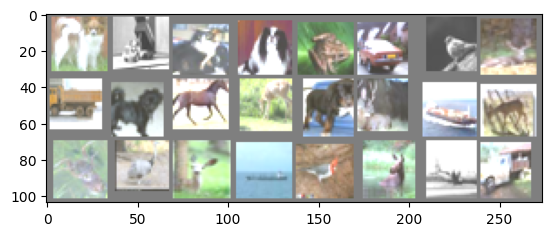

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()  
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 

# 随机获取部分训练数据
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(" ".join('%5s' % classes[labels[j]] for j in range(4))) 
# 结果：car  ship truck horse


In [4]:
import torch.nn as nn

# 如果有gpu使用GPU加速
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.features = nn.Sequential(
            #1
            nn.Conv2d(3,64,kernel_size=3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            #2
            nn.Conv2d(64,64,kernel_size=3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            #3
            nn.Conv2d(64,128,kernel_size=3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            #4
            nn.Conv2d(128,128,kernel_size=3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            #5
            nn.Conv2d(128,256,kernel_size=3,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            #6
            nn.Conv2d(256,256,kernel_size=3,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            #7
            nn.Conv2d(256,256,kernel_size=3,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            #8
            nn.Conv2d(256,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            #9
            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            #10
            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            #11
            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            #12
            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            #13
            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.AvgPool2d(kernel_size=1,stride=1),
            )
        self.classifier = nn.Sequential(
            #14
            nn.Linear(512,4096),
            nn.ReLU(True),
            nn.Dropout(0.45),
            #15
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(0.45),
            #16
            nn.Linear(4096,num_classes),
            )
 
    def forward(self, x):
        out = self.features(x) 
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out

# 实例化模型
net = VGG16()
net.to(device)  # 模型设备转移
# 查看模型
print(net)

VGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 2

In [5]:
#交叉熵损失函数
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.4, last_epoch=-1)

In [6]:
## 训练模型
for epoch in range(num_epoches):
    running_loss = 0.0
    # 迭代，批次训练
    for i, data in enumerate(train_loader, 0):
        # 获取训练数据
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # 权重参数梯度清零
        optimizer.zero_grad()
        
        # 正向传播
        outputs = net(inputs)
        # 计算损失值
        loss = criterion(outputs, labels)
        # 反向传播
        loss.backward()
        # 参数更新
        optimizer.step()
        # 损失值累加
        running_loss += loss.item()
        # 每2000个mini-batch显示一次损失值
        if i % 2000 == 1999:
            print('[%d, %d] loss:%.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    scheduler.step()
print('Finished Training')

[1, 2000] loss:1.519
[2, 2000] loss:1.028
[3, 2000] loss:0.835
[4, 2000] loss:0.716
[5, 2000] loss:0.575
[6, 2000] loss:0.527
[7, 2000] loss:0.496
[8, 2000] loss:0.472
[9, 2000] loss:0.406
[10, 2000] loss:0.384
[11, 2000] loss:0.371
[12, 2000] loss:0.360
[13, 2000] loss:0.327
[14, 2000] loss:0.323
[15, 2000] loss:0.314
[16, 2000] loss:0.302
[17, 2000] loss:0.290
[18, 2000] loss:0.286
[19, 2000] loss:0.282
[20, 2000] loss:0.285
[21, 2000] loss:0.277
[22, 2000] loss:0.276
[23, 2000] loss:0.272
[24, 2000] loss:0.273
[25, 2000] loss:0.268
[26, 2000] loss:0.271
[27, 2000] loss:0.267
[28, 2000] loss:0.265
[29, 2000] loss:0.266
[30, 2000] loss:0.264
[31, 2000] loss:0.266
[32, 2000] loss:0.261
[33, 2000] loss:0.263
[34, 2000] loss:0.265
[35, 2000] loss:0.265
[36, 2000] loss:0.265
[37, 2000] loss:0.264
[38, 2000] loss:0.267
[39, 2000] loss:0.261
[40, 2000] loss:0.265
Finished Training


In [7]:
correct = 0    # 预测正确数目
total = 0     # 测试样本总数
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)  # 获取批次预测结果
        total += labels.size(0)                    # 批次数目累加
        correct += (predicted == labels).sum().item()  # 预测正确数累加

print('Accuracy of the network on the 10000 test images: %d %%' %(100*correct/total))

Accuracy of the network on the 10000 test images: 86 %


In [8]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %5s: %2d %%' %(classes[i], 100 * class_correct[i] /class_total[i]))

Accuracy of plane: 85 %
Accuracy of   car: 93 %
Accuracy of  bird: 79 %
Accuracy of   cat: 68 %
Accuracy of  deer: 84 %
Accuracy of   dog: 81 %
Accuracy of  frog: 91 %
Accuracy of horse: 91 %
Accuracy of  ship: 95 %
Accuracy of truck: 96 %
